In [1]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [2]:
#TODO: do this also for mjo without TDE to see whether it really helps. if not, change tde to different method.

In [3]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project, Statistics, JLD2

┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt C:\Users\lisah\.julia\packages\Flux\9PibT\ext\FluxCUDAExt\FluxCUDAExt.jl:10


## Perform error analysis on MJO predictions

### prepare data

In [4]:
# load data
header = ["year", "month", "day", "hour", "PC1 coeff", "PC2 coeff", "PC1+PC2 amplitude"]
data = CSV.read("data/mjo_data/mjo_romi.txt", DataFrame; delim=" ", ignorerepeated=true, header=header)
pc1 = data[!,"PC1 coeff"]
pc2 = data[!,"PC2 coeff"];

# perform TDE
D1, τ1 = enso_project.tde_with_negative_shift(pc1)
D2, τ2 = enso_project.tde_with_negative_shift(pc2)
D1, D2 = D1', D2';

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.
Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


In [5]:
# train, test, val splits
train_size = 10000
val_size = 2000
test_size = size(D1,2) - train_size - val_size

519

In [6]:
train_pc1, train_pc2 = D1[:, 1:train_size],  D2[:, 1:train_size]
val_pc1, val_pc2 = D1[:, train_size+1:train_size+val_size], D2[:, train_size+1:train_size+val_size]
test_pc1, test_pc2 = D1[:, train_size+val_size+1:train_size+val_size+test_size], D2[:, train_size+val_size+1:train_size+val_size+test_size];

### gather prediction samples

In [7]:
# sample size N
N = 200

# lead time L
L = 60

# check whether test set is large enough
test_size > N+L

true

### training

In [8]:
spectral_radii = [0.8,0.9,1.0]
sparsities = [0.14,0.1,0.5]
input_scales = [0.1,1.0]
ridge_values = [0.0,1e-5, 1e-6]
reservoir_sizes = [500,700,1000]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [9]:
# pc1
predictions_pc1, datasets_test_pc1 = enso_project.sample_lead_times(L,N,D1, train_size, val_size,param_grid)

enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 14879.793515161044
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 1.0e-5)
Validation loss = 14859.044115309363
Finished sample 1
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 14885.828161750407
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 1.0e-5)
Validation loss = 14865.221233962198
Finished sample 2
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 14891.913611246217
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 1.0e-5)
Validation loss = 14871.45466366961
Finished sample 3
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 14898.432826932018
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 1.0e-5)
Validation loss = 14878.130049756302
Finished sample 4
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 14905.157612466433
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 1.0e-5)
Validation loss = 14885.013137042955
Fini

([-0.9657233325984974 -0.8048085811310862 … 0.382989726865319 0.4434946552998788; -0.8765299202366112 -0.6989883623369996 … 0.31418586922498154 0.4070332752854355; … ; 0.9601454950647976 0.7806346142423787 … 0.08682853892996804 0.04468737540931399; 0.9390590331061317 0.8003858104058599 … 0.11527555569774188 0.008918799324346322], [-1.00198 -0.99269 … -0.33316 -0.295; -0.99269 -0.9764 … -0.295 -0.23475; … ; 1.04004 0.88814 … 0.69629 0.24112; 0.88814 0.76656 … 0.24112 -0.27262])

In [10]:
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_predictions_pc1.csv", DataFrame(predictions_pc1, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_testsets_pc1.csv", DataFrame(datasets_test_pc1, :auto))

"C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L60_N200_testsets_pc1.csv"

In [11]:
# pc2
predictions_pc2, datasets_test_pc2 = enso_project.sample_lead_times(L,N,D2, train_size, val_size,param_grid)

enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 12357.615366818529
enso_project.ESNHyperparams(1000, 0.8, 0.14, 0.1, 0.0)
Validation loss = 11538.31239007171
enso_project.ESNHyperparams(1000, 0.8, 0.5, 0.1, 1.0e-6)
Validation loss = 11524.218006475643
Finished sample 1
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 12365.614513804503
enso_project.ESNHyperparams(1000, 0.8, 0.14, 0.1, 0.0)
Validation loss = 11549.162913982336
enso_project.ESNHyperparams(1000, 0.8, 0.5, 0.1, 1.0e-6)
Validation loss = 11534.047456918383
Finished sample 2
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 12373.517824999955
enso_project.ESNHyperparams(1000, 0.8, 0.14, 0.1, 0.0)
Validation loss = 11560.641415532822
enso_project.ESNHyperparams(1000, 0.8, 0.5, 0.1, 1.0e-6)
Validation loss = 11542.345592503378
Finished sample 3
enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 12381.279843376462
enso_project.ESNHyperpara

([-1.1910412588639447 -1.4930679976887125 … -2.1448782016697456 -2.829514455213769; -1.2594905017400455 -1.4200846180793045 … -1.74282030997603 -1.782729959098981; … ; -0.5548524275984494 -0.2935426489851603 … -0.08205678708414711 0.03461227587484327; -0.36082385399322825 -0.10754444931287371 … 0.011608616641516719 0.12432906036403508], [-1.0902 -1.10705 … -0.70967 -0.54446; -1.10705 -1.06785 … -0.54446 -0.55808; … ; -0.58507 -0.32449 … 0.59632 0.42182; -0.32449 -0.01559 … 0.42182 0.22535])

In [12]:
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_predictions_pc2.csv", DataFrame(predictions_pc2, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_testsets_pc2.csv", DataFrame(datasets_test_pc2, :auto))

"C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L60_N200_testsets_pc2.csv"

### error analysis

In [13]:
predictions_pc1 = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_predictions_pc1.csv", DataFrame))
datasets_test_pc1 = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_testsets_pc1.csv", DataFrame));

predictions_pc2 = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_predictions_pc2.csv", DataFrame))
datasets_test_pc2 = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/mjo_tde_L$(L)_N$(N)_testsets_pc2.csv", DataFrame));

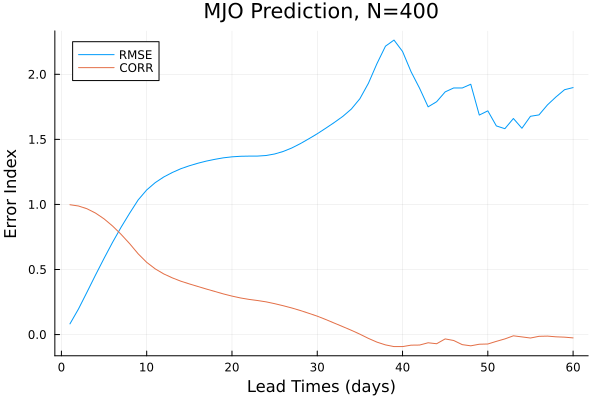

In [14]:
rmse_vals = enso_project.rmse(predictions_pc1, datasets_test_pc1, predictions_pc2, datasets_test_pc2)
corr_vals = enso_project.bivariate_corr(predictions_pc1, datasets_test_pc1, predictions_pc2, datasets_test_pc2)
plot(rmse_vals, label="RMSE", xlabel="Lead Times (days)", ylabel="Error Index", title="MJO Prediction, N=400")
plot!(corr_vals,label="CORR")
#savefig("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/fig_saves/mjo_error.png")

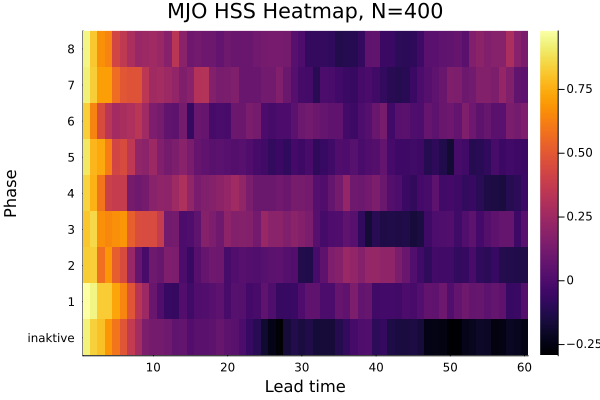

In [15]:
hss_vals = enso_project.hss(predictions_pc1,predictions_pc2,datasets_test_pc1, datasets_test_pc2)

heatmap(hss_vals,
    #color=:viridis,   # choose your colormap
    title="MJO HSS Heatmap, N=400",
    xlabel="Lead time",
    ylabel="Phase",
    na_color=:white,   # color for NaN values
    yticks=(1:9, ["inaktive","1","2","3","4","5","6","7","8"])
)

#savefig("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/fig_saves/mjo_error_hss.png")